<a href="https://colab.research.google.com/github/adhalya/estatistica_regressao_logistica_e_classificacao/blob/main/DataSet_Iris_Modelo_de_Classifica%C3%A7%C3%A3o_e_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### DataSet Iris

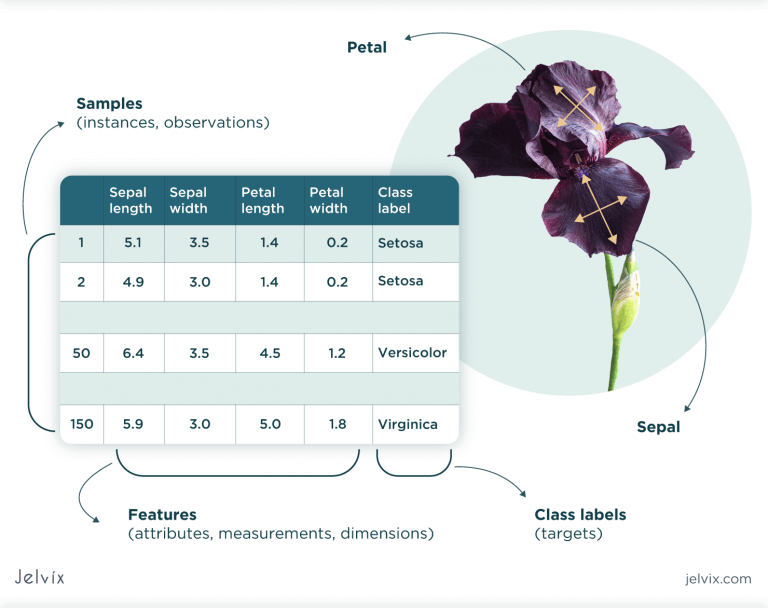


Descrição das Colunas:

- **Sepal_Length(cm):** Comprimento da Sépala
- **Sepal_Width(cm):** Largura da Sépala
- **Petal_Length(cm):** Comprimento da Pétala
- **Petal_Width(cm):** Largura da Pétala
- **Species:** Espécie

In [1]:
# Importando bibliotecas de manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Realizando a leitura do DataSet através do GitHub e Pandas
iris = pd.read_csv("https://raw.githubusercontent.com/adhalya/estatistica_regressao_logistica_e_classificacao/main/CSV/iris.csv")

# Visualizando as primeiras linhas do DataSet
iris.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### Análise inicial

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

1. Estatística Descritiva

In [5]:
# Compreendendo as features
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Compreendendo a variável target
iris.describe(include=['object'])

,Species
count,150
unique,3
top,setosa
freq,50


In [7]:
# Analisando se no DataSet contém valores nulos e quais os tipos de dados das variáveis
analise_iris = pd.DataFrame(iris.dtypes)
analise_iris.columns = ["Dtype"]
analise_iris['Valores Nulos'] = iris.isnull().sum()
analise_iris['% Valores Nulos'] = (iris.isnull().sum() / iris.shape[0]) * 100
analise_iris['NUnique']= iris.nunique()

In [8]:
analise_iris

,Dtype,Valores Nulos,% Valores Nulos,NUnique
Sepal_Length,float64,0,0.0,35
Sepal_Width,float64,0,0.0,23
Petal_Length,float64,0,0.0,43
Petal_Width,float64,0,0.0,22
Species,object,0,0.0,3


> *Através das análises iniciais conseguimos identificar as variáveis atributos (**Sepal_Length, Sepal_Width, Petal_Length e Petal_Width**) e a variável target (**Species**), ou seja, a variável que queremos identificar através do treinamento com as variáveis atributos. Temos um dataset contendo 150 linhas e nenhuma delas contém valores nulos. Todas as variáveis atributos são do tipo float, ou seja, não precisam ser transformadas já que o modelo não entende variáveis contendo strings. Também conseguimos identificar que o dataframe contém 50 linhas para cada uma das 3 espécies, ou seja, o dataframe está balanceado, não necessitando realizar Oversampling ou Undersampling*

2. Distribuição das Variáveis

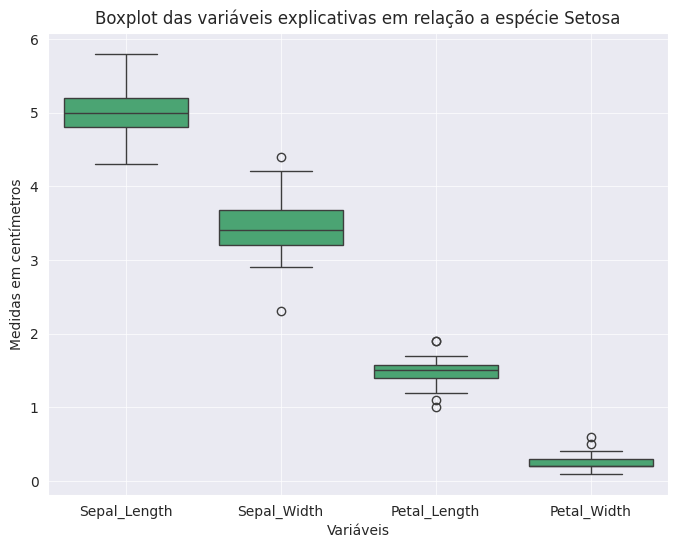

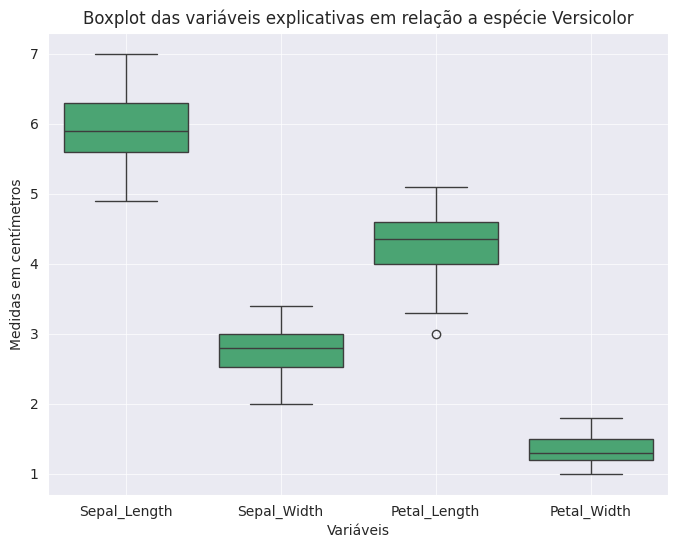

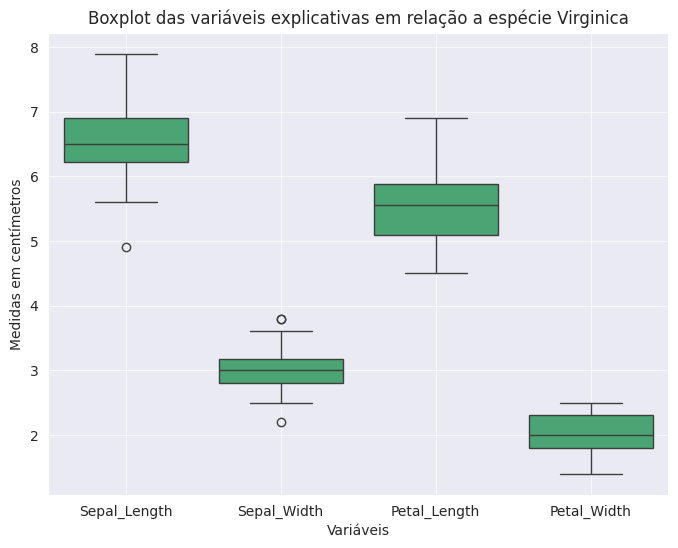

In [9]:
# @title Boxplot - Espécies x Dimensões Pétalas e Sépalas
# Filtrando os dataframes considerando as espécies
dados_setosa = iris[iris['Species'] == "setosa"]
dados_versicolor = iris[iris['Species'] == "versicolor"]
dados_virginica = iris[iris['Species'] == "virginica"]

# Plotando Boxplot da espécie Setosa
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.boxplot(data=dados_setosa[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], color='mediumseagreen')
plt.title('Boxplot das variáveis explicativas em relação a espécie Setosa')
plt.ylabel('Medidas em centímetros')
plt.xlabel('Variáveis')
plt.grid(color='white', linestyle='-', linewidth=0.5)
plt.show()

# Plotando Boxplot da espécie Versicolor
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.boxplot(data=dados_versicolor[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], color='mediumseagreen')
plt.title('Boxplot das variáveis explicativas em relação a espécie Versicolor')
plt.ylabel('Medidas em centímetros')
plt.xlabel('Variáveis')
plt.grid(color='white', linestyle='-', linewidth=0.5)
plt.show()

# Plotando Boxplot da espécie Virginica
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.boxplot(data=dados_virginica[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], color='mediumseagreen')
plt.title('Boxplot das variáveis explicativas em relação a espécie Virginica')
plt.ylabel('Medidas em centímetros')
plt.xlabel('Variáveis')
plt.grid(color='white', linestyle='-', linewidth=0.5)
plt.show()

> *Através do boxplot podemos conhecer quais as características das espécies considerando a dimensão das pétalas e das sépalas, além de poder saber a mediana, podemos identificar os quartis e os outliers presentes nas variáveis de cada espécie.*

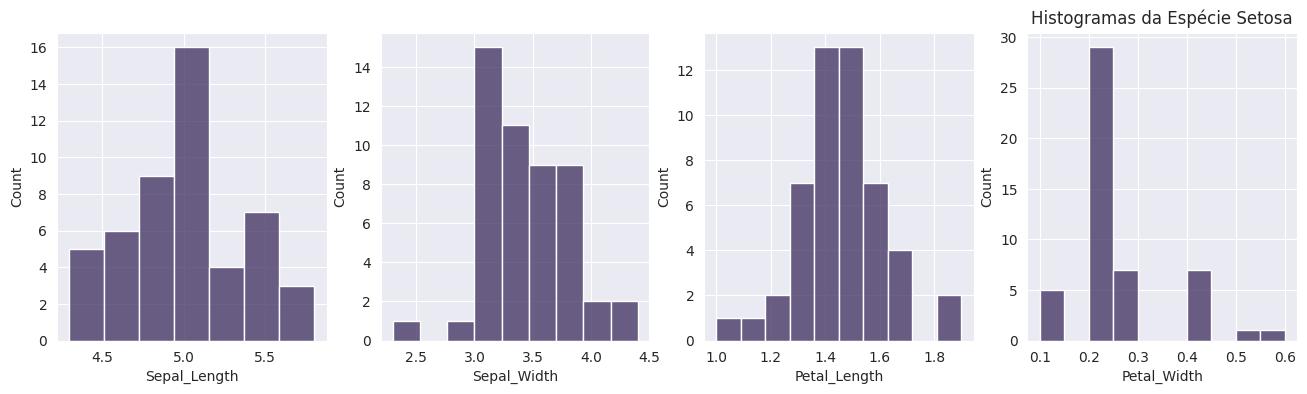

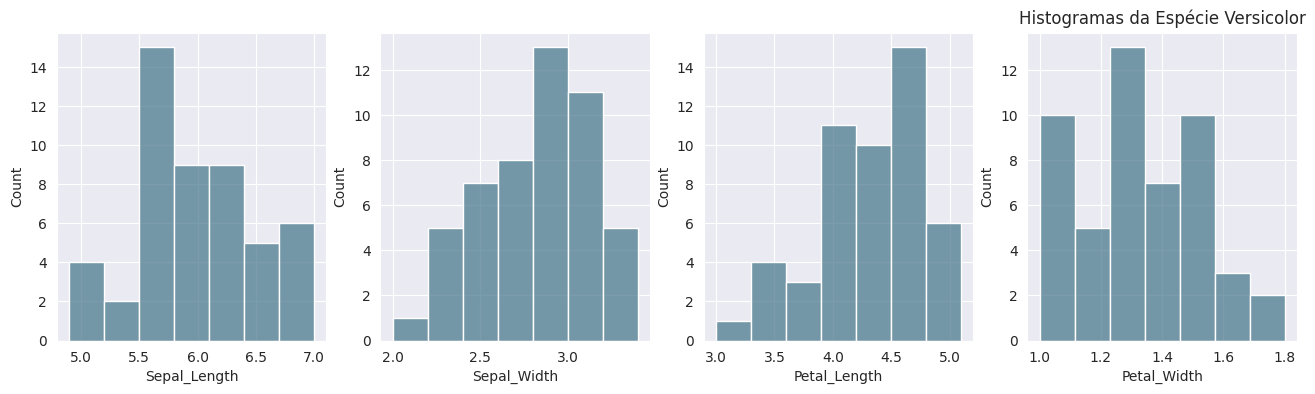

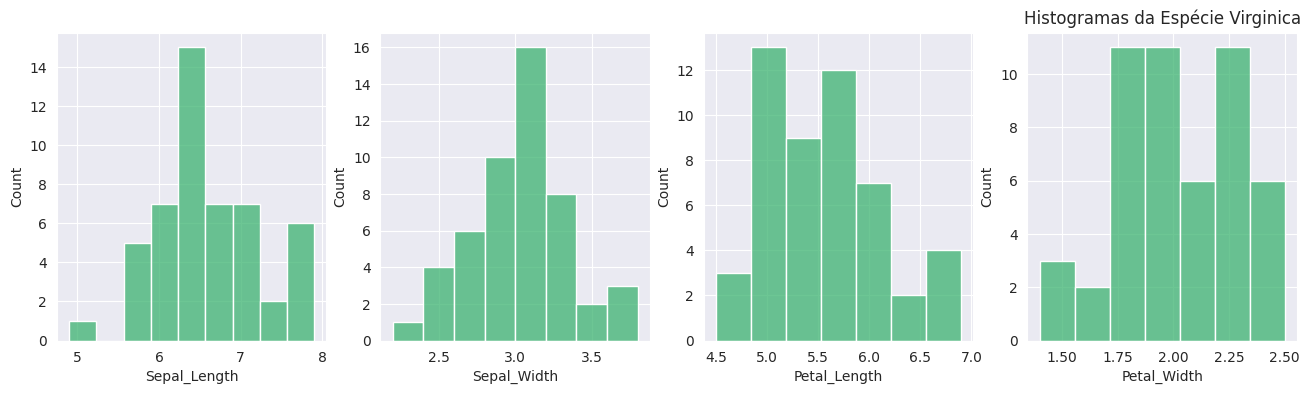

In [10]:
# @title Histogramas
# Histograma - Espécie Setosa
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
sns.set_style("darkgrid")

plt.title("Histogramas da Espécie Setosa")
for i, col in enumerate(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']):
    sns.histplot(data=dados_setosa[col], color='#3c2c5d', ax=axs[i])

plt.show()

# Histograma - Versicolor
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

plt.title("Histogramas da Espécie Versicolor")
for i, col in enumerate(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']):
    sns.histplot(data=dados_versicolor[col], color='#4D7B8F', ax=axs[i])

plt.show()

# Histograma - Virginica
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

plt.title("Histogramas da Espécie Virginica")
for i, col in enumerate(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']):
    sns.histplot(data=dados_virginica[col], color='mediumseagreen', ax=axs[i])

plt.show()

<Figure size 800x600 with 0 Axes>

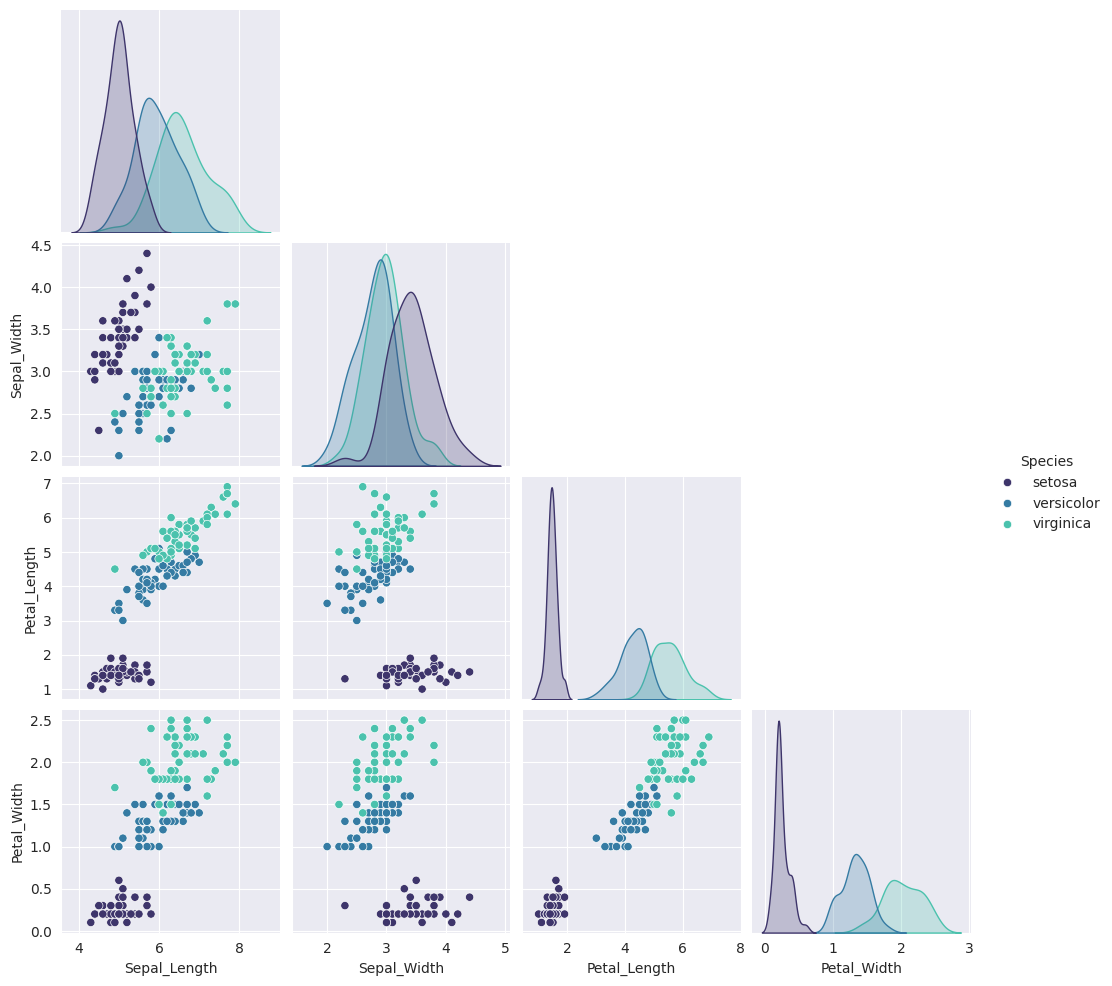

In [11]:
# @title Gráfico de Pares
plt.figure(figsize=(8, 6))
sns.pairplot(iris, hue='Species', palette='mako', diag_kind='kde', height=2.5, corner=True)
plt.show()

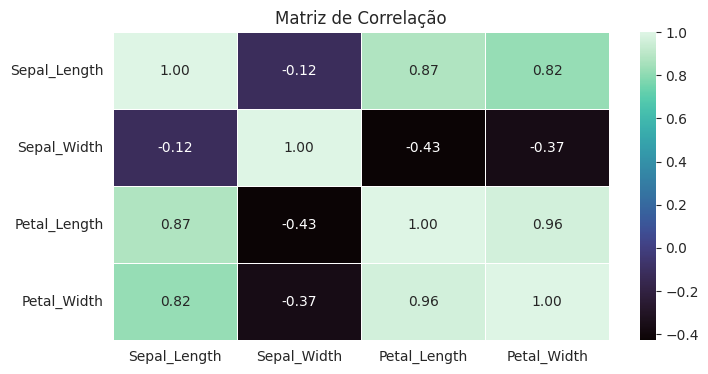

In [12]:
# @title Matriz de Correlação
# Calculando a correlação para entender como as variáveis numéricas se correlacionam umas com as outras
df_iris = iris.select_dtypes(include=['float64'])
corr_iris = df_iris.corr()

# Exibindo o gráfico de matriz de correlação
plt.figure(figsize=(8, 4))
sns.heatmap(corr_iris, annot=True, cmap='mako', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

> *O gráfico de pares e o histograma auxilia na comprensão do comportamento das espécies considerando as variáveis de dimensões das pétalas e sépalas. Temos uma correlação muito forte entre **Petal Width e Petal_Length**, entre **Petal_Width e Sepal_Length** e entre **Petal_Length e Sepal_Length**, indicando que são variáveis importantes para uma identificação precisa das espécies no modelo. Por não conter uma correlação muito forte, a variável **Sepal_Width** pode ser desconsiderada.*

##### Treinando o Modelo

In [13]:
# Importando os pacotes do Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

In [14]:
# Definindo as variáveis atributos e a variável target do modelo
features = ["Sepal_Length", "Petal_Length", "Petal_Width"]
target = ["Species"]

X = iris[features]
y = iris[target]

In [15]:
# Separando as variáveis de teste e treino do modelo na porcentagem 80-20.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando a regressão logística para treinar o modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=200)

In [16]:
# Aplicação do Modelo
y_pred = model.predict(X_test)

# Previsão da Probabilidade
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [17]:
X_test["Previsao_Modelo"] = y_pred
X_test["Probabilidade_Espécie"] = y_pred_proba

In [18]:
X_test

,Sepal_Length,Petal_Length,Petal_Width,Previsao_Modelo,Probabilidade_Espécie
73,6.1,4.7,1.2,versicolor,0.826687
18,5.7,1.7,0.3,setosa,0.083152
118,7.7,6.9,2.3,virginica,0.002086
78,6.0,4.5,1.5,versicolor,0.786014
76,6.8,4.8,1.4,versicolor,0.777768
31,5.4,1.5,0.4,setosa,0.044605
64,5.6,3.6,1.3,versicolor,0.922722
141,6.9,5.1,2.3,virginica,0.149970
68,6.2,4.5,1.5,versicolor,0.806920
82,5.8,3.9,1.2,versicolor,0.946957


> *Para o treinamento do modelo foram utilizadas somente as variáveis atributos que obtiveram um valor próximo a 1 na matriz de correlação, indicando que elas possuiam uma forte relação linear, por isto, a variável **Sepal_Width** não foi utilizada para o treinamento.*

##### Testando o Modelo

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [20]:
# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


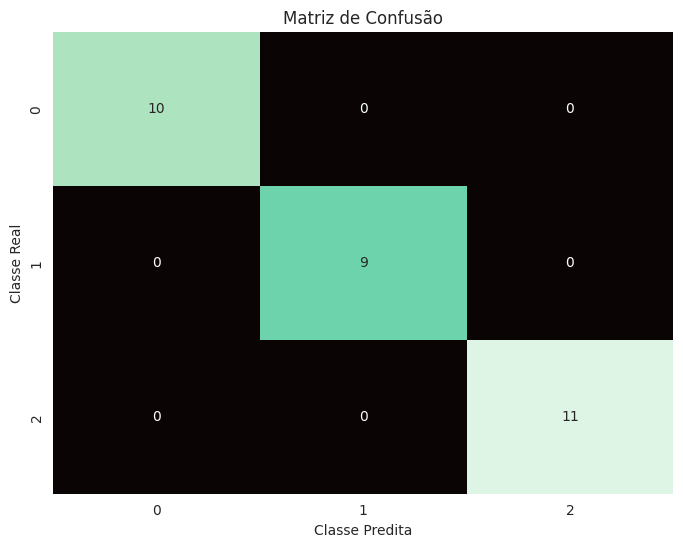

In [21]:
# @title Matriz de Confusão
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='mako', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

> *Através dos testes e da matriz de correlação percebemos que o modelo acertou 100% das espécies, podendo ser utilizado posteriormente para prever as espécies com novos dados.*